## Presentación

Etapa 1 - Introducción al análisis de datos

Jesús Antonio Zapata Romero

ANÁLISIS DE DATOS - (202016908A_1394)

Javier Leonardo Pineda Uribe

Universidad Nacional Abierta y a Distancia-UNAD
Escuela de Ciencias Básicas, Tecnología e Ingeniería
Ingeniería de Sistemas (Resolución 011685)
Cali – 12 de octubre de 2023

## Lista de definiciones

* **Datos de Train, validation and test:** <p style="text-align: justify;">En el contexto del aprendizaje automático, es esencial evaluar el desempeño y la adecuación de un modelo predictivo. Para lograrlo, se requiere dividir los datos en dos subconjuntos fundamentales. El primero es el conjunto de entrenamiento (Train), utilizado para capacitar al modelo. El segundo es el conjunto de pruebas (Testing), empleado para evaluar el rendimiento del modelo entrenado~1~. No obstante, en ocasiones es necesario incluir un tercer subconjunto: el conjunto de validación. Este conjunto se encarga de ajustar los hiperparámetros del modelo y actúa como un proceso iterativo para obtener el modelo más afinado antes de llevar a cabo las pruebas finales con el conjunto de pruebas.</p>
<img src="Training_validation_test.png" alt="Data train, validation and test" width="400" style="display: block; margin: 0 auto;">
---
* **Gradient descent:** <p style="text-align: justify;">En el aprendizaje automático, el método del Descenso de Gradiente es ampliamente utilizado. Este algoritmo iterativo de primer orden nos ayuda a localizar mínimos o máximos locales en una función dada. En el contexto del aprendizaje automático, esta función se refiere comúnmente a la función de costo o pérdida, la cual optimizamos a través del Descenso de Gradiente~2~.</p>
<img src="Gradient.jpg" alt="Gradient descent" width="400" style="display: block; margin: 0 auto;">
---
* **Machine learning losses:** <p style="text-align: justify;">En el aprendizaje automático, las funciones de pérdida desempeñan un papel fundamental al evaluar la precisión de un modelo. Su función principal consiste en medir el error de predicción para una muestra específica. En resumen, estas funciones guían el proceso de aprendizaje del modelo al minimizar las discrepancia entre las predicciones y los valores objetivos.~3~.</p>
<img src="Losses.jpg" alt="Losses function" width="400" style="display: block; margin: 0 auto;">
---
* **cross validation:** <p style="text-align: justify;">En el aprendizaje automático, la validación cruzada se utiliza para evaluar modelos mediante divisiones iterativas de los datos en conjuntos de entrenamiento y prueba. Esto permite medir la capacidad de generalización del modelo y evitar el sobreajuste o subajuste, mejorando la confiabilidad de las evaluaciones y la selección del modelo.~4~</p>
<img src="Cross_validation.png" alt="Losses function" width="400" style="display: block; margin: 0 auto;">

## Referencias

1. Telefónica Tech. Datos de entrenamiento vs datos de test. (2022, enero 24). https://telefonicatech.com/blog/datos-entrenamiento-vs-datos-de-test
2. Kwiatkowski, R. Towards Data Science .Gradient Descent Algorithm — a deep dive .(2021, mayo 22). https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21
3. Yehoshuahttps, R. Towards Data Science. Loss Functions in Machine Learning. (2023, mayo 12). https://towardsdatascience.com/loss-functions-in-machine-learning-9977e810ac02
4. Vladimir Lyashenko. Neptune.AI. Cross-Validation in Machine Learning: How to Do It Right. (2023, agosto 30). https://towardsdatascience.com/what-is-cross-validation-60c01f9d9e75

### Importar librerías

In [2]:
# Importar os para lectura del dataset desde el SO
import os

# Importar pandas y numpy para manipulación de datos
import pandas as pd
import numpy as np

# Importar sklearn para aplicar el modelo arbol de decision
from sklearn import tree
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix

# Importar matplotlib y seaborn para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
font = {'size': 12}
plt.rc('font', **font)

### Subir el dataset

In [3]:
# Importamos el dataset y validamos su estructura
os.chdir("C:\\Users\\jazapatar\\Analisis_de_datos\\Unidad_3")
datos = pd.read_csv("train.csv", delimiter=',')
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploración de datos

* ¿Cuales son las dimensiones del dataset?
* ¿Cuales son los nombres de los campos del dataset?
* ¿Hay valores faltantes en el dataset?
* ¿Cual es el tipo de dato de cada campo del dataset?

In [4]:
num_rows, num_cols = datos.shape
print("\033[1mDimensiones del dataset:\033[0m")
print("\033[1mNúmero de filas:\033[0m", num_rows, ", \033[1mNúmero de columnas:\033[0m", num_cols)

Dimensiones del dataset:
Número de filas: 891 , Número de columnas: 12


In [5]:
columns_names = datos.columns
print("\033[1mNombre de las columnas del dataset:\033[0m \n")
print(columns_names)

Nombre de las columnas del dataset: 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
print("\033[1mNúmero de datos faltantes por campo:\033[0m")
datos.isna().sum()

Número de datos faltantes por campo:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print("\033[1mTipos de datos en el dataset:\033[0m \n")
print(datos.dtypes)

Tipos de datos en el dataset: 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Limpieza e imputación de datos

* ¿Cómo serán manejado los datos faltantes en los campos del dataset?
* ¿Deberían tenerse en cuenta los valores atipicos de campos como la edad o la tarifa?
* ¿Hay filas duplicadas que deban ser removidas del dataset?

In [8]:
print("\033[1mLos datos faltantes en el dataset serán llenados con el valor promedio de sus respectivos campos o con la etiqueta NE\033[0m")
datos['Age'] = datos['Age'].fillna(round(datos['Age'].mean()))
datos['Cabin'] = datos['Cabin'].fillna("NE")
datos['Embarked'] = datos['Embarked'].fillna("NE")
datos.isna().sum()

Los datos faltantes en el dataset serán llenados con el valor promedio de sus respectivos campos o con la etiqueta NE


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
# NOTA: Dejo la anotación de no volver a repetir la ejecución de este script (más de una vez) por que siempre va a ejecutar 
# la consulta de cuartiles y por ende a obtener outliers

print("\033[1mLos datos\033[0m ")
# Calcular el rango intercuartil (IQR) para la columna 'Edad'
Q1_edad = datos['Age'].quantile(0.25)
Q3_edad = datos['Age'].quantile(0.75)
IQR_edad = Q3_edad - Q1_edad

# Calcular el rango intercuartil (IQR) para la columna 'Tarifa'
Q1_tarifa = datos['Fare'].quantile(0.25)
Q3_tarifa = datos['Fare'].quantile(0.75)
IQR_tarifa = Q3_tarifa - Q1_tarifa

# Identificar valores atípicos en 'Edad' y 'Tarifa'
outliers_edad = (datos['Age'] < (Q1_edad - 1.5 * IQR_edad)) | (datos['Age'] > (Q3_edad + 1.5 * IQR_edad))
outliers_tarifa = (datos['Fare'] < (Q1_tarifa - 1.5 * IQR_tarifa)) | (datos['Fare'] > (Q3_tarifa + 1.5 * IQR_tarifa))

# Extraer los valores atípicos
outliers_edad_values = datos[outliers_edad]
outliers_tarifa_values = datos[outliers_tarifa]

print('\033[1mDatos anomalos edad:\033[0m ', len(outliers_edad_values))
print('\033[1mDatos anomalos tarifa:\033[0m ', len(outliers_tarifa_values))

# Limpiar el dataset de los valores atípicos
datos.drop(datos[outliers_edad | outliers_tarifa].index, inplace=True)

Los datos 
Datos anomalos edad:  66
Datos anomalos tarifa:  116


In [10]:
print('\033[1mValidamos si el dataset tiene datos duplicados:\033[0m')
datos.duplicated()

Validamos si el dataset tiene datos duplicados:


0      False
2      False
3      False
4      False
5      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 721, dtype: bool

## Estadística descriptiva

* ¿Cuál es la distribución de la variable objetivo 'Survived'?
* ¿Cuál es la distribución de la edad de los pasajeros?
* ¿Cuál es la distribución de las tarifas de los pasajeros?
* ¿Cuantos pasajeros estaban en cada clase 1ra, 2da y 3ra?

Distribución de la variable Survived en el dataset:


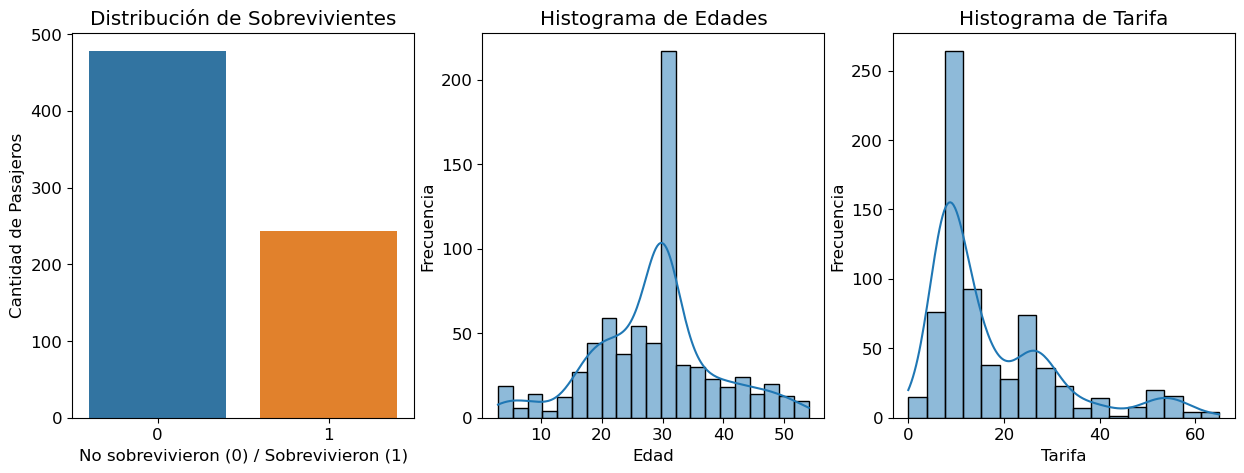

In [11]:
print('\033[1mDistribución de la variable Survived en el dataset:\033[0m')
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
# Gráfico de barras de la distribución de 'Survived'
sns.countplot(x='Survived', data=datos, ax = axes[0])
axes[0].set_title('Distribución de Sobrevivientes')
axes[0].set_xlabel('No sobrevivieron (0) / Sobrevivieron (1)')
axes[0].set_ylabel('Cantidad de Pasajeros')

sns.histplot(datos['Age'], kde=True, ax = axes[1])
axes[1].set_title('Histograma de Edades')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')

sns.histplot(datos['Fare'], kde=True, ax = axes[2])
axes[2].set_title('Histograma de Tarifa')
axes[2].set_xlabel('Tarifa')
axes[2].set_ylabel('Frecuencia')

plt.show()

In [12]:
clase_counts = datos['Pclass'].value_counts()

print('\033[1mCantidad de pasajeros en cada clase:\033[0m\n')
print(clase_counts)

Cantidad de pasajeros en cada clase:

3    462
2    164
1     95
Name: Pclass, dtype: int64


## Ingeniería de funciones

* ¿Campos nuevos se pueden crear de preexistentes? 
* ¿Cómo se manejan los campos categoricos?
* ¿Los campos continuos se deben agrupar o escalar?

In [13]:
print('\033[1m* No es necesario crear nuevos campos\033[0m')
print('\033[1m* Los campos categoricos serán removidos porque no aportan al tipo de modelo que se quiere obtener\033[0m')
print('\033[1m* No hay datos continuoes en este dataset, pero si hubiera no sería necesario aplicarle ningún tratamiento\033[0m')

* No es necesario crear nuevos campos
* Los campos categoricos serán removidos porque no aportan al tipo de modelo que se quiere obtener
* No hay datos continuoes en este dataset, pero si hubiera no sería necesario aplicarle ningún tratamiento


## Visualización de datos

* ¿Hay alguna correlación o relación entre campos?
* ¿Se puede visualizar la tasa de sobrevivencia por clase, genero o grupo de edad?

In [14]:
#print('\033[1mSe valida un mapa de calor para entender la relación entre campos del dataset:\033[0m')
#plt.figure(figsize = (14, 22))
#sns.heatmap(datos.corr(), cmap = 'Blues', annot = True)

In [15]:
# Verificar tabla de correlación
print('\033[1mSe visualiza la tabla de correlaciones\033[0m (de más fácil lectura en este caso)')
datos.corr()

Se visualiza la tabla de correlaciones (de más fácil lectura en este caso)


C:\Users\jazapatar\AppData\Local\Temp\ipykernel_988\1734905312.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.040909,-0.050985,0.042341,-0.078373,-0.018513,0.010801
Survived,-0.040909,1.000000,-0.273088,-0.065899,0.004221,0.079950,0.260557
Pclass,-0.050985,-0.273088,1.000000,-0.291924,0.081216,0.064847,-0.593781
Age,0.042341,-0.065899,-0.291924,1.000000,-0.292626,-0.135909,0.091184
SibSp,-0.078373,0.004221,0.081216,-0.292626,1.000000,0.392674,0.370951
Parch,-0.018513,0.079950,0.064847,-0.135909,0.392674,1.000000,0.335415
Fare,0.010801,0.260557,-0.593781,0.091184,0.370951,0.335415,1.000000


Verifiquemos la tasa de supervivencia por clase, genero y grupo de edad:


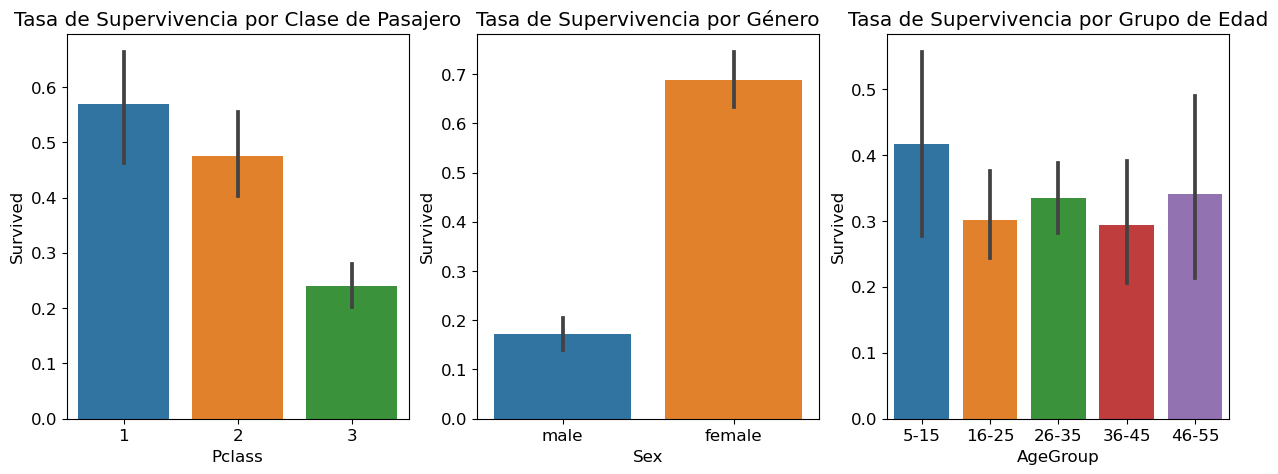

Cantidad de personas en clase#1:  95
Cantidad de personas en clase#2:  164
Cantidad de personas en clase#3:  462
--------------------------------------------

Cantidad de personas en hombres:  0
Cantidad de personas en mujeres:  0
--------------------------------------------

Cantidad de personas entre 5 y 15 años:  40
Cantidad de personas entre 16 y 25 años:  189
Cantidad de personas entre 26 y 35 años:  338
Cantidad de personas entre 36 y 45 años:  92
Cantidad de personas entre 45 y 55 años:  45

Nota: Note que las lineas verticales en cada barra representan los intervalos de confianza, lo cual indica la variabilidad 
y la incertidumbre asociada a las estimaciones de los datos. En este caso debido a la diferencia de tamaños en los conjuntos
se crea un incertidumbre y variabilidad mayor en conjuntos con menor número de elementos.


In [16]:
print('\033[1mVerifiquemos la tasa de supervivencia por clase, genero y grupo de edad:\033[0m')
# Crear una figura con tres subgráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Tasa de supervivencia por clase de pasajero
sns.barplot(x='Pclass', y='Survived', data=datos, ax=axes[0])
axes[0].set_title('Tasa de Supervivencia por Clase de Pasajero')

# Gráfico 2: Tasa de supervivencia por género
sns.barplot(x='Sex', y='Survived', data=datos, ax=axes[1])
axes[1].set_title('Tasa de Supervivencia por Género')

# Crear intervalos de edad (por ejemplo, 0-9, 10-19, 20-29, ...)
datos['AgeGroup'] = pd.cut(datos['Age'], bins=[5, 15, 25, 35, 45, 55], labels=['5-15', '16-25', '26-35', '36-45', '46-55'])

# Gráfico 3: Tasa de supervivencia por grupo de edad
sns.barplot(x='AgeGroup', y='Survived', data=datos, ax=axes[2])
axes[2].set_title('Tasa de Supervivencia por Grupo de Edad')

plt.show()

print('\033[1mCantidad de personas en clase#1\033[0m: ', datos[datos['Pclass'] == 1]['Pclass'].count())
print('\033[1mCantidad de personas en clase#2\033[0m: ', datos[datos['Pclass'] == 2]['Pclass'].count())
print('\033[1mCantidad de personas en clase#3\033[0m: ', datos[datos['Pclass'] == 3]['Pclass'].count())
print('--------------------------------------------\n')
print('\033[1mCantidad de personas en hombres\033[0m: ', datos[datos['Sex'] == 0]['Sex'].count())
print('\033[1mCantidad de personas en mujeres\033[0m: ', datos[datos['Sex'] == 1]['Sex'].count())
print('--------------------------------------------\n')
print('\033[1mCantidad de personas entre 5 y 15 años\033[0m: ', datos[(datos['Age'] >= 5) & (datos['Age'] <= 15)]['Age'].count())
print('\033[1mCantidad de personas entre 16 y 25 años\033[0m: ', datos[(datos['Age'] >= 16) & (datos['Age'] <= 25)]['Age'].count())
print('\033[1mCantidad de personas entre 26 y 35 años\033[0m: ', datos[(datos['Age'] >= 26) & (datos['Age'] <= 35)]['Age'].count())
print('\033[1mCantidad de personas entre 36 y 45 años\033[0m: ', datos[(datos['Age'] >= 36) & (datos['Age'] <= 45)]['Age'].count())
print('\033[1mCantidad de personas entre 45 y 55 años\033[0m: ', datos[(datos['Age'] >= 46) & (datos['Age'] <= 55)]['Age'].count())

print('''\n\033[1mNota:\033[0m Note que las lineas verticales en cada barra representan los intervalos de confianza, lo cual indica la variabilidad 
y la incertidumbre asociada a las estimaciones de los datos. En este caso debido a la diferencia de tamaños en los conjuntos
se crea un incertidumbre y variabilidad mayor en conjuntos con menor número de elementos.''')

## Equilibrar el conjunto de datos

* ¿El dataset está desbalanceado con respecto al campo objetivo 'Survived'?
* ¿Si hay desbalance en el dataset que tecnicas pueden ser aplicadas?

In [17]:
print('\033[1mValidamos si hay un desvalance en nuesta variable objetivo:\n\033[0m')
# Supongamos que 'datos' es tu DataFrame
survived_counts = datos['Survived'].value_counts()

print('Conteo de Sobrevivientes (1) y No Sobrevivientes (0):')
print(survived_counts)

# Calcular la proporción
proporciones = survived_counts / len(datos)
print('\nProporción de Sobrevivientes y No Sobrevivientes:\n')
print(proporciones)
print('\n\033[1mEfectivamente evidenciamos un desbalance en las proporciones\033[0m')

Validamos si hay un desvalance en nuesta variable objetivo:

Conteo de Sobrevivientes (1) y No Sobrevivientes (0):
0    478
1    243
Name: Survived, dtype: int64

Proporción de Sobrevivientes y No Sobrevivientes:

0    0.662968
1    0.337032
Name: Survived, dtype: float64

Efectivamente evidenciamos un desbalance en las proporciones


In [18]:
print('''\033[1mAplicamos un Submuestreo de la clase mayoritaria. Lo cual significa reducir el número de instancias de la
clase mayoritaria para equilibrar las clases.\033[0m\n''')
# Clase mayoritaria (No Sobrevivió)
clase_mayoritaria = datos[datos['Survived'] == 0]

# Clase minoritaria (Sobrevivió)
clase_minoritaria = datos[datos['Survived'] == 1]

# Submuestreo de la clase mayoritaria para igualar la cantidad de muestras de la clase minoritaria
clase_mayoritaria_submuestreada = resample(clase_mayoritaria, replace=False, n_samples=len(clase_minoritaria), random_state=42)

# Combina las dos clases submuestreadas en un nuevo DataFrame
datos = pd.concat([clase_mayoritaria_submuestreada, clase_minoritaria])

Aplicamos un Submuestreo de la clase mayoritaria. Lo cual significa reducir el número de instancias de la
clase mayoritaria para equilibrar las clases.



## División del dataset en Entrenamiento-Prueba, y aplicación del modelo

* ¿Cómo se debe dividir el dataset en conjunto de entrenamieto y prueba para entrenar y evaluar el modelo de arbol de decisión?

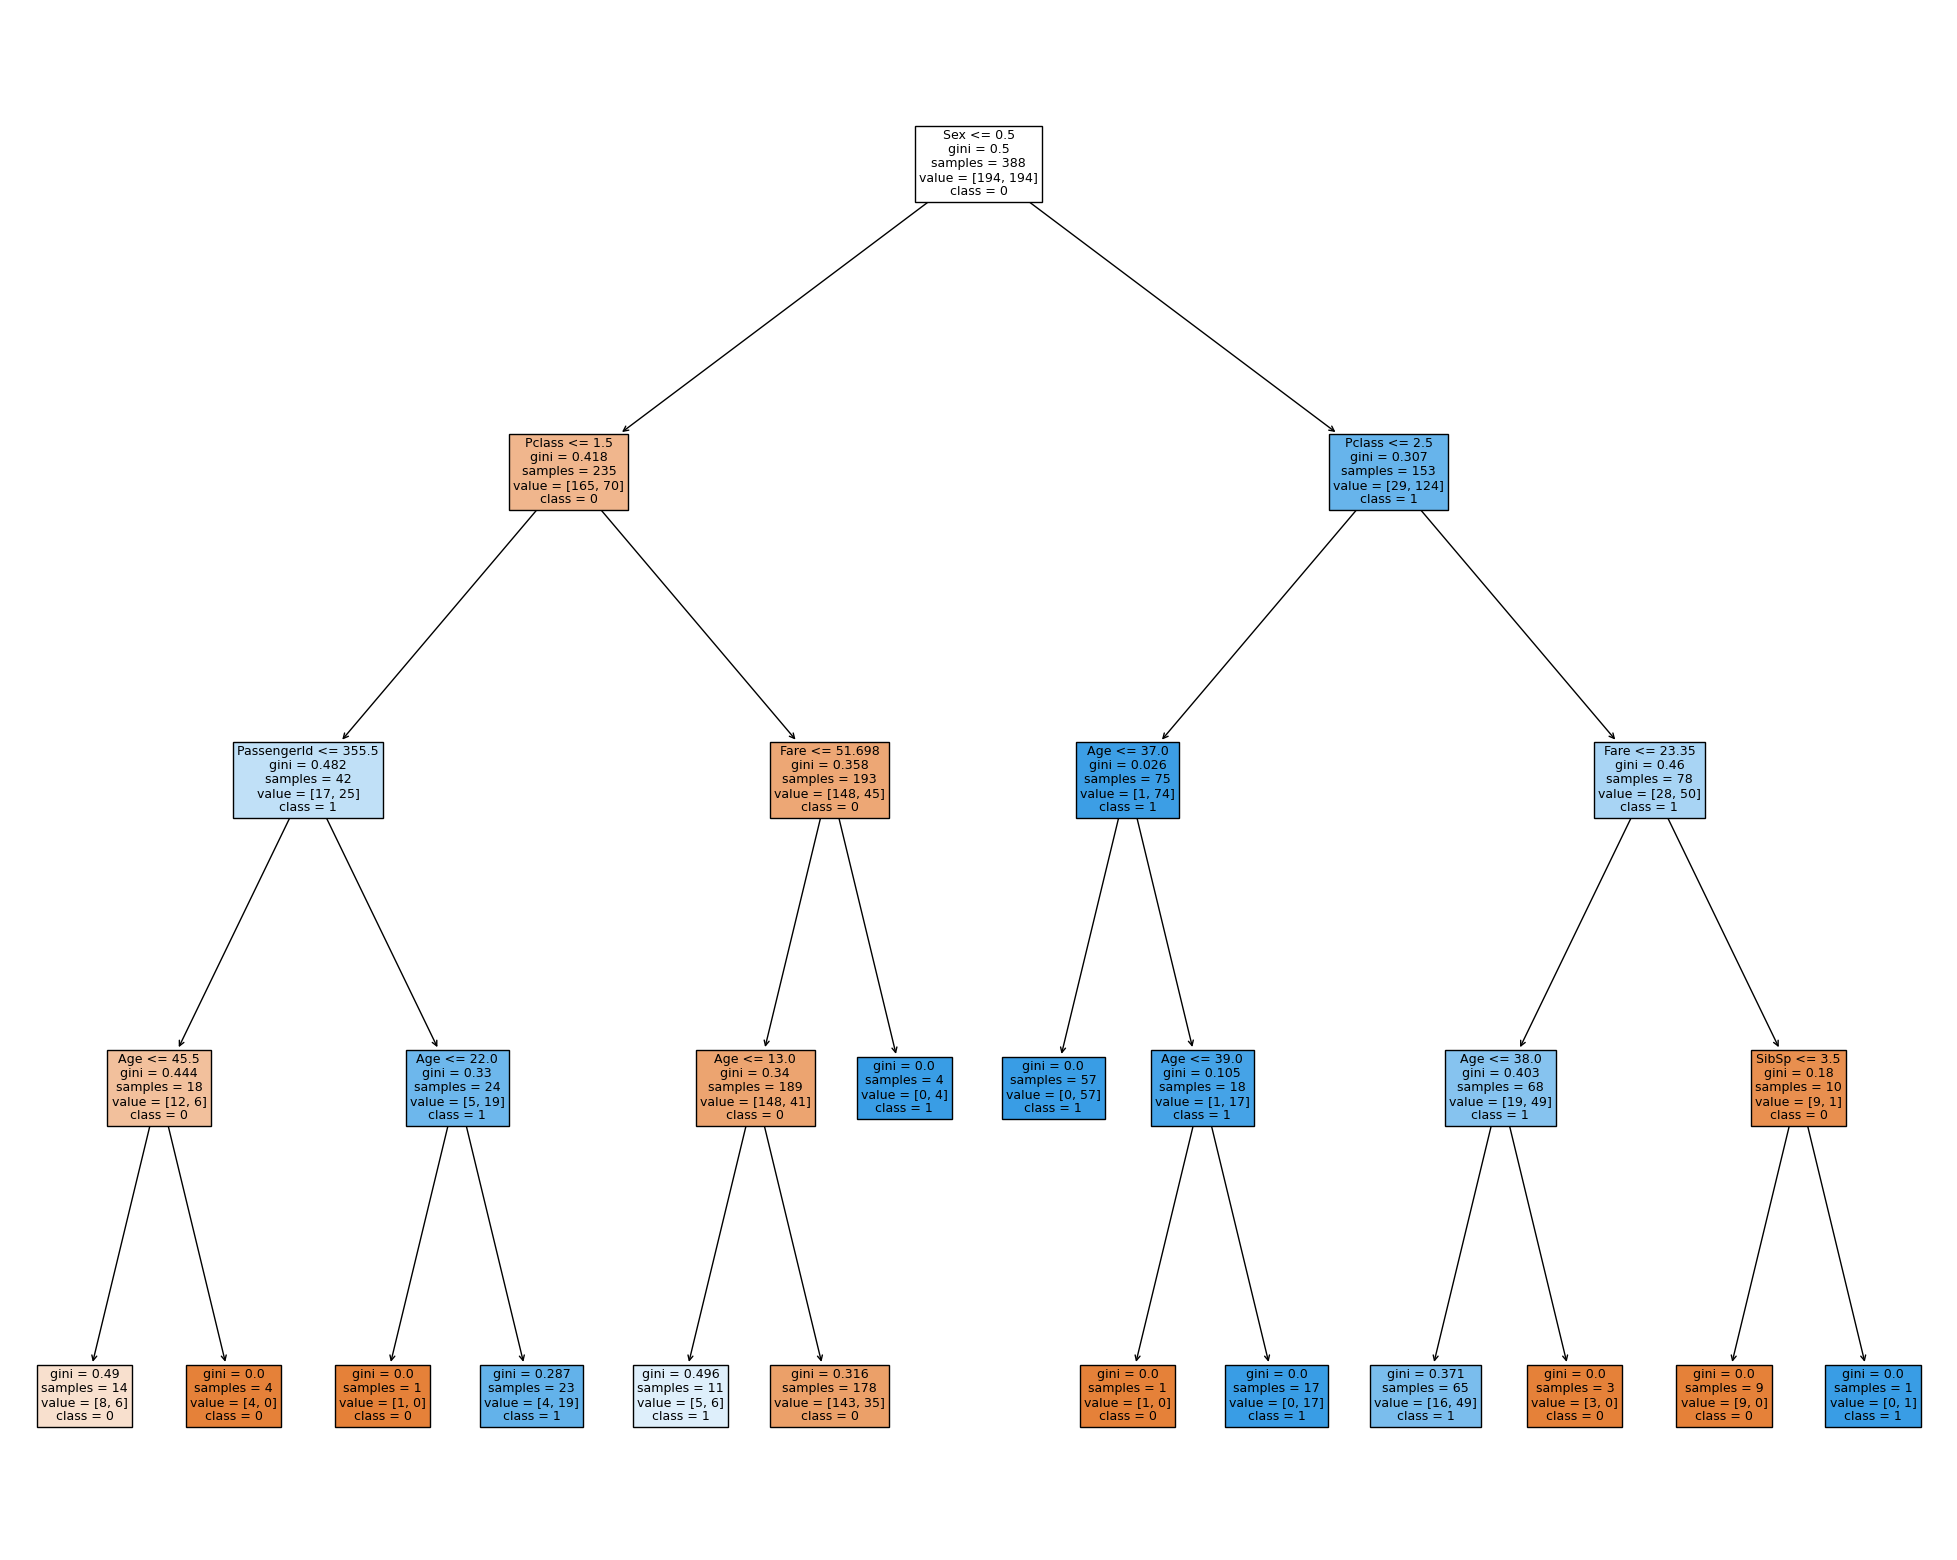

In [19]:
# Mapeo de los datos a valores númericos
datos['Survived'].replace(('No', 'Si'), (0, 1), inplace = True)
datos['Sex'].replace(('male', 'female'), (0,1), inplace = True)

# Eliminación de datos categóricos que no ayudaran en el modelo
# Separación en datos dependientes e independiente
X = datos.drop(columns = ['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked', 'AgeGroup'])
Y = datos['Survived']

# Separación datos de entrenamiento y prueba con razón de pareto 80-20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8,random_state=0)

# Creamos nuestro modelo de regresión lineal
arbol = DecisionTreeClassifier(max_depth=4)

# Aplicamos el modelos al conjunto de entrenamiento
arbol_sobrevivir = arbol.fit(X_train, Y_train)

# Definimos el tamaño de nuestra visualización
fig = plt.figure(figsize=(25,20))

# Construimos nuestro árbol de decisión para ser visualizado
tree.plot_tree(arbol_sobrevivir, feature_names=list(X_train.columns.values),
              class_names=list({"0", "1"}), filled=True)

# Visualizamos nuestro árbol de decisión
plt.show()

In [20]:
# Aplicamos validación con el conjunto de prueba
Y_pred = arbol_sobrevivir.predict(X_test)
mapeo = {0: "SI", 1: "NO"}
print('\033[1mPredicción de sobrevivientes:\033[0m \n\n', np.vectorize(mapeo.get)(Y_pred))

# Verificamos nuestro modelo a través de una matriz de confusión
print('\n \033[1mConteo de predicciones exitos y no exitosas:\033[0m')
matriz_confusion = confusion_matrix(Y_test, Y_pred)
matriz_confusion

Predicción de sobrevivientes: 

 ['NO' 'NO' 'SI' 'NO' 'SI' 'NO' 'SI' 'NO' 'SI' 'SI' 'NO' 'NO' 'NO' 'NO'
 'NO' 'SI' 'NO' 'SI' 'SI' 'NO' 'SI' 'NO' 'NO' 'SI' 'SI' 'NO' 'SI' 'NO'
 'NO' 'NO' 'NO' 'SI' 'SI' 'SI' 'SI' 'SI' 'SI' 'NO' 'SI' 'SI' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'SI' 'NO' 'NO' 'SI' 'NO' 'SI' 'SI'
 'NO' 'NO' 'NO' 'NO' 'SI' 'NO' 'SI' 'NO' 'SI' 'NO' 'SI' 'SI' 'NO' 'NO'
 'SI' 'SI' 'SI' 'NO' 'SI' 'NO' 'SI' 'NO' 'NO' 'NO' 'SI' 'NO' 'SI' 'SI'
 'SI' 'NO' 'NO' 'SI' 'SI' 'SI' 'NO' 'NO' 'NO' 'SI' 'NO' 'SI' 'SI' 'SI']

 Conteo de predicciones exitos y no exitosas:


array([[36, 13],
       [ 9, 40]], dtype=int64)

In [21]:
## Validamos la precisión de nuestro modelo (validaciones correctas)
Presicion_Global = np.sum(matriz_confusion.diagonal())/np.sum(matriz_confusion)
print("\033[1mLa precisión de nuestro modelo es de:\033[0m", np.round(Presicion_Global*100, 2), "% en terminos generales")

## Validamos la precisión de nuestro modelo (validación correcta de No Sobrevientes)
Presicion_death = matriz_confusion[1,1]/np.sum(matriz_confusion[1,])
print("\033[1mLa precisión de nuestro modelo es de:\033[0m", np.round(Presicion_death*100, 2), "% en sobrevivientes")

## Validamos la precisión de nuestro modelo (validación correcta de Sobrevientes)
Presicion_alive = matriz_confusion[0,0]/np.sum(matriz_confusion[0,])
print("\033[1mLa precisión de nuestro modelo es de:\033[0m", np.round(Presicion_alive*100, 2), "% en no sobrevivientes")

print('''\n\033[1mNota:\033[0m la presición está basada en los valores correctos que dio el modelo con respecto al 
conjunto de prueba en terminos de sobrevivientes y no sobrevivientes''')

La precisión de nuestro modelo es de: 77.55 % en terminos generales
La precisión de nuestro modelo es de: 81.63 % en sobrevivientes
La precisión de nuestro modelo es de: 73.47 % en no sobrevivientes

Nota: la presición está basada en los valores correctos que dio el modelo con respecto al 
conjunto de prueba en terminos de sobrevivientes y no sobrevivientes


## Notas

Se uso solamente el archivo train.csv debido a que el test.csv carecia del campo objetivo.

## Conclusión

<p style="text-align: justify;"> Teniendo en cuenta la matriz de confusión obtenida a partir de nuestro modelo de Titanic, esta revela un rendimiento alentador en la clasificación de pasajeros. El modelo ha demostrado una capacidad sólida para predecir tanto verdaderos positivos como verdaderos negativos, con 40 casos clasificados correctamente como sobrevivientes <strong>(81.63%)</strong>  y 37 casos correctamente clasificados como no sobrevivientes <strong>(75.51%)</strong>.</p>

<p style="text-align: justify;">Sin embargo, es importante tener en cuenta que se observaron algunos errores, representados por 12 falsos positivos y 9 falsos negativos. Estos errores resaltan la necesidad de un análisis más profundo y refinamientos adicionales del modelo. A pesar de esto, el rendimiento general del modelo es un indicio positivo de su eficacia para abordar el problema de clasificación en el contexto del desastre del Titanic.</p>

# Anexo 
## Comparación de algoritmos

### Definiciones

<p style="text-align: justify;"><strong>Árbol de decisión:</strong> Es un modelo que toma decisiones aprendiendo reglas simples de los datos. Divide el conjunto de datos en subconjuntos más pequeños basados en características particulares para predecir la variable objetivo.</p>

<p style="text-align: justify;"><strong>Bosques Aleatorios (Random Forest):</strong> Es una técnica que utiliza múltiples árboles de decisión y combina sus predicciones para obtener un resultado más robusto y generalizable. Cada árbol se entrena de forma independiente y luego vota por la clase más popular.</p>

<p style="text-align: justify;"><strong>Support Vector Machines (SVM):</strong> Es un algoritmo que encuentra el mejor límite de decisión entre las clases maximizando el margen entre ellas. Puede usar diferentes kernels para transformar los datos y encontrar un límite no lineal en el espacio de características.</p>

## Comparación a través del Accuracy

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Creamos nuestro modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenamos el modelo
random_forest.fit(X_train, Y_train)

# Evaluamos la precisión del modelo
accuracy = random_forest.score(X_test, Y_test)
print("Precisión del modelo de Random Forest:", accuracy)

Precisión del modelo de Random Forest: 0.7857142857142857


In [31]:
# Calculando la precisión del árbol de decisión
from sklearn.metrics import accuracy_score

accuracy_tree = accuracy_score(Y_test, Y_pred)
print("Precisión del árbol de decisión:", accuracy_tree)

Precisión del árbol de decisión: 0.7755102040816326


In [32]:
from sklearn.svm import SVC

# Creamos nuestro modelo SVM
svm_model = SVC(kernel='linear', random_state=0)  # Utilizando un kernel lineal

# Entrenamos el modelo
svm_model.fit(X_train, Y_train)

# Haciendo predicciones
svm_predictions = svm_model.predict(X_test)

# Calculando la precisión del modelo SVM
accuracy_svm = accuracy_score(Y_test, svm_predictions)
print("Precisión del modelo SVM:", accuracy_svm)

Precisión del modelo SVM: 0.7653061224489796


En este caso, se puede observar que el modelo de Bosques Aleatorios obtuvo el mayor accuracy (precisión) en comparación con el árbol de decisión y SVM. Sin embargo, las diferencias que se presentan entre estos modelos son bastante pequeñas.

Considerando estas precisiones cercanas entre sí, se puede concluir que para este conjunto de datos específico del Titanic, los tres modelos (SVM, árbol de decisión y Bosques Aleatorios) funcionan relativamente bien y ninguno se destaca considerablemente sobre los otros en términos de precisión.

Sin embargo, es importante tener en cuenta que el accuracy no es la única métrica para evaluar la idoneidad de un modelo. Por lo tanto se realiza una segunda opinión mediante la implementación de la métrica área bajo la curva ROC y así elegir el algoritmo más adecuado para dar conclusiones sobre este dataset Titanic.

## Comparación a través del área bajo la curva ROC

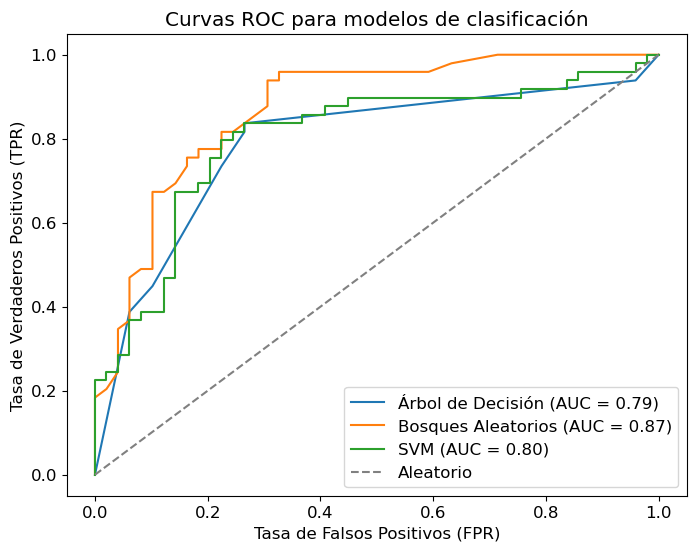

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las predicciones de probabilidad para cada modelo
probs_tree = arbol_sobrevivir.predict_proba(X_test)[:, 1]
probs_forest = random_forest.predict_proba(X_test)[:, 1]
probs_svm = svm_model.decision_function(X_test)

# Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
fpr_tree, tpr_tree, _ = roc_curve(Y_test, probs_tree)
fpr_forest, tpr_forest, _ = roc_curve(Y_test, probs_forest)
fpr_svm, tpr_svm, _ = roc_curve(Y_test, probs_svm)

# Calcular el área bajo la curva ROC (AUC) = 'Area Under Curve'
auc_tree = auc(fpr_tree, tpr_tree)
auc_forest = auc(fpr_forest, tpr_forest)
auc_svm = auc(fpr_svm, tpr_svm)

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Árbol de Decisión (AUC = {auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Bosques Aleatorios (AUC = {auc_forest:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para modelos de clasificación')
plt.legend()
plt.show()

## Conclusión

Cómo se sabe, el AUC es el área bajo la curva ROC y este proporciona un valor numérico que resume la capacidad de un modelo para discriminar entre clases. Su valor está entre 0 y 1, donde:

* AUC = 1: Indica un modelo perfecto que puede distinguir perfectamente entre clases. Su curva ROC cubre toda el área del gráfico.
* AUC = 0.5: Indica un modelo que clasifica al azar, ya que su curva ROC coincide con la línea de referencia (diagonal).
* AUC < 0.5: Indica un modelo peor que el azar, clasificando incorrectamente las clases.

Para nuestro estudio obtuvimos efectivamente que el mejor algoritmo para un dataset del tipo Titanic que estamos trabajando es el Bosques Aleatorios (Random Forest) ya que este nos arroja un AUC de 0.89 que ya de por si nos habla de un modelo que clasifica con bastante grado de precisión, pero encima es el de mayor valor frente a los otros dos.